Sneha Mishra

UIN 733000826

### Problem 1:
Use the **dataset1.xlsx** to answer this question.

#### Data description:										
This dataset contains worldwide internet usage of 39 countries in 2003 published by the United Nations. The aim is to assess the influence of four different factors - GDP, $\text{CO}_2$, number of cellular phone subscribers and fertility on the internet usage.

The variables in the dataset are:	
1. **Nation**: Name of different nations 
2. **Internet**: The percentage of adult residents who used the Internent										
3. **GDP**: Gross Domestic Product, per capita in thousands of U.S. dollars 										
4. **CO2**: Carbon  dioxide emissions, per capita				
5. **Cellular**: Percentate of adults who are cellular phone subscribers 										
6. **Fertility**: Mean number of children per adult women	

**Note**: The variable $\textbf{Nation}$ is given here as a supportive information only. 
#### Question:

(a) Find the datatypes of the variables in the dataset. Are there any missing values?  

(b) Compute the summary statistics  for each of the variables: '$\textbf{INTERNET}$', '$\textbf{GDP}$', '$\textbf{CO2}$', '$\textbf{CELLULAR}$', '$\textbf{FERTILITY}$'.

(c) Describe the shape of the distribution of each variable using a suitable graphical method. Justify your choice. 

(d) Check for the normality of each numeric variables.

(e) What is the target varible of this dataset ?

(f) By using a suitable graphical representation, visualize associations between the target variable and other variables. 

(g) Compute the correlation between variables: '$\textbf{INTERNET}$', '$\textbf{GDP}$', '$\textbf{CO2}$', '$\textbf{CELLULAR}$', '$\textbf{FERTILITY}$' using the $\textbf{Pearson's}, \textbf{ Spearman's rank}$ and **$\phi_k$** correlation coefficients.  Create heat maps to visualize the correlation matrixes.

(h) How does the target variable associate with the other variables (linear and/or non-linear)? Justify your answer.

(i) Which variable has the highest association with the target variable? Plot the target variable against the variable you selected using $\texttt{lmplot}$. 


\[ Marks: $5\times 10 = 50$ \]

### Problem 2:
The file $\textbf{dataset2.pkl}$ contains a simulated dataset having 100 rows and 5 columns.

(a) Read the dataset $\textbf{dataset2.pkl}$ as a dataframe and name it "**df1**". Set the column names to: **"A", "B", "C", "D", "E"**.

(b) Get the summary statistics (**only mean, median, and standard deviation**) of each column and save it as **"df1_sm"**.

(c) For column **"B"** in **"df1"**, find which rows have values **greater than 1.00**?

(d) Create a dataframe **df2** where the values greater than 1.00 in column "**B**" of **df1** are replaced with **NaN** (Not A Number). NaN is a particular data type. Do not replace with the string "NaN". 

(e) Calculate the number of NaN values per column of **df2**.

(f) Create a new dataframe **"df2_imputed"**, where the NaN values in **df2** are replaced with the corresponding **column mean** (this procedure is called mean imputation). Compute its summary statistics (only mean, median, and standard deviation) and save them as **"df2_sm"**.
 
(h) Create a dataframe **"df3_imputed"** where the NaN values in each row of **df2** are replaced with the corresponding row mean. Compute summary statistics (only mean, median, and standard deviation) and save them as **"df3_sm"**. 

(i) Creat a boxplot visualization to compare the columns in the three datasets  "df1", "df2_imputed", and "df3_imputed". 

(j) Which procedure do you think is better: column mean imputation or row mean imputation? Justify your answer.

\[Marks :  $5 \times 10 = 50$ \]

In [71]:
# 1. Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pingouin as pg
sns.set_style("darkgrid", rc=None)

# 1. (a) solution
df = pd.read_csv('dataset1.csv', sep=',')
df = pd.read_excel(r'dataset1.xlsx', engine='openpyxl', usecols='A:F')
print(df.dtypes)
print(df.isna().sum())


NATION        object
INTERNET     float64
GDP          float64
CO2          float64
CELLULAR     float64
FERTILITY    float64
dtype: object
NATION       0
INTERNET     0
GDP          0
CO2          0
CELLULAR     0
FERTILITY    0
dtype: int64


As per the above output, there are no missing values in the dataset.

In [8]:
# 1. (b) solution
df.describe().iloc[:, 0:5]

,INTERNET,GDP,CO2,CELLULAR,FERTILITY
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,21.141026,15.992308,6.805128,41.838462,2.379487
std,18.472080,10.598396,4.673326,31.801743,1.245028
min,0.100000,0.800000,0.300000,0.300000,1.100000
25%,2.600000,6.050000,3.050000,11.150000,1.650000
50%,20.100000,17.400000,6.800000,36.200000,2.000000
75%,37.900000,25.400000,9.500000,74.350000,2.650000
max,51.600000,34.300000,19.700000,90.700000,7.000000


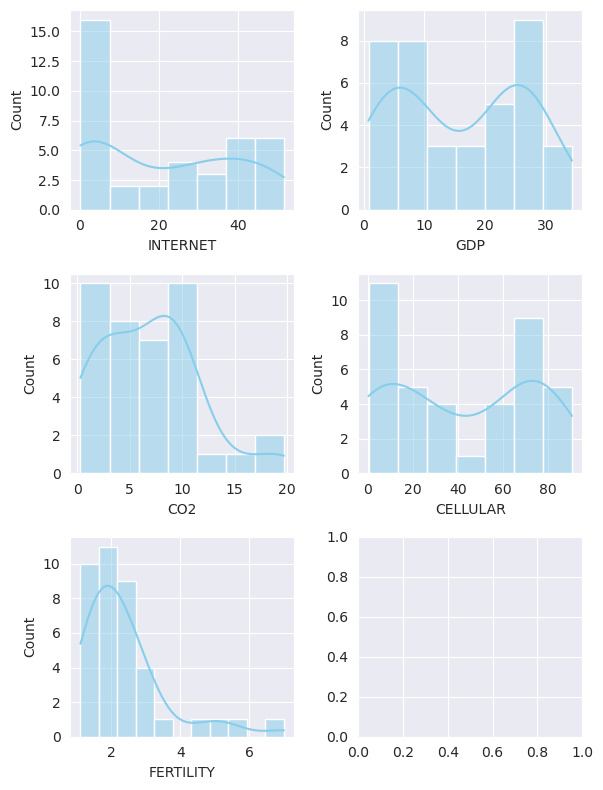

In [22]:
# 1. (c) Solution
fig,axs = plt.subplots(3,2, figsize = (6,8))
sns.histplot(data=df, x="INTERNET", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="GDP", kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df, x="CO2", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df, x="CELLULAR", kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=df, x="FERTILITY", kde=True, color="skyblue", ax=axs[2, 0])
fig.tight_layout()

Since all the concerned variables are numeric data, a histogram plot of variable vs frequency with the plot line gives an optimum visualization regarding the distribution and various insights regarding the data. As per the plots, we can see that the distribution is not normally distributed for any of the variables.

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

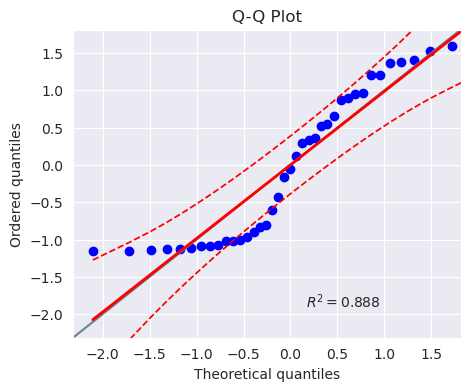

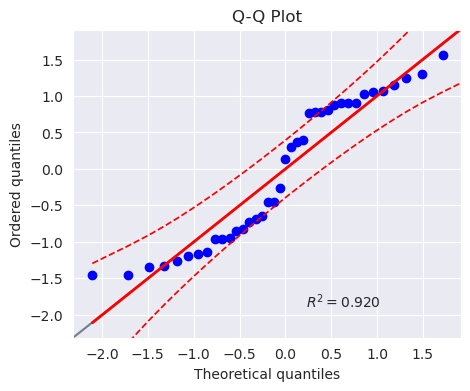

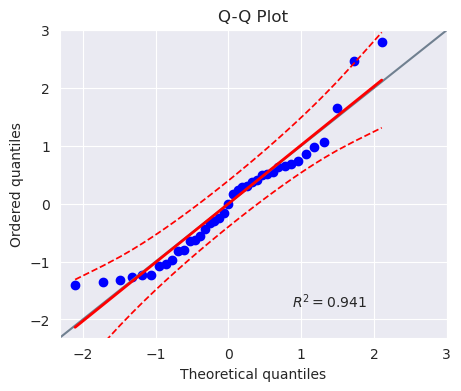

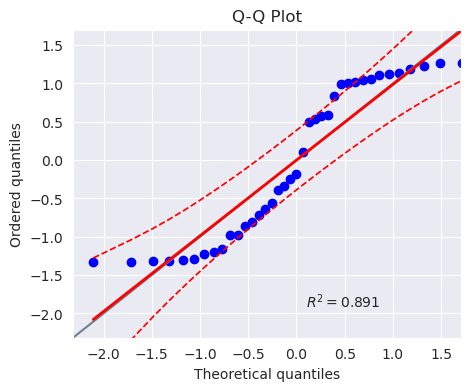

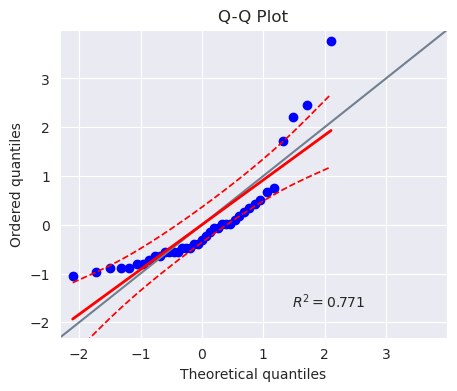

In [30]:
# 1. (d) Solution
import pingouin as pg
pg.qqplot(df.INTERNET)
pg.qqplot(df.GDP)
pg.qqplot(df.CO2)
pg.qqplot(df.CELLULAR)
pg.qqplot(df.FERTILITY)

As per the QQ-Plots, the above mentioned five attributes have no normal distribution.


# 1.(e) Solution

The target variable of the dataset is "INTERNET". The aim of the analysis is basically to find the influence of four factors mainly GDP, CO2 emission level, cellular, on the INTERNET usage. So, internet is the main attribute about which we wish to gain a deeper understanding through analysis and visualization. 

<AxesSubplot:xlabel='GDP', ylabel='INTERNET'>

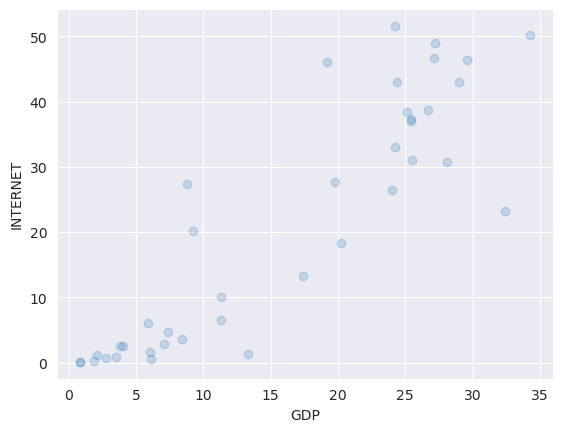

In [56]:
# 1.(f) Solution
sns.regplot(x = "GDP", y="INTERNET", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

<AxesSubplot:xlabel='CO2', ylabel='INTERNET'>

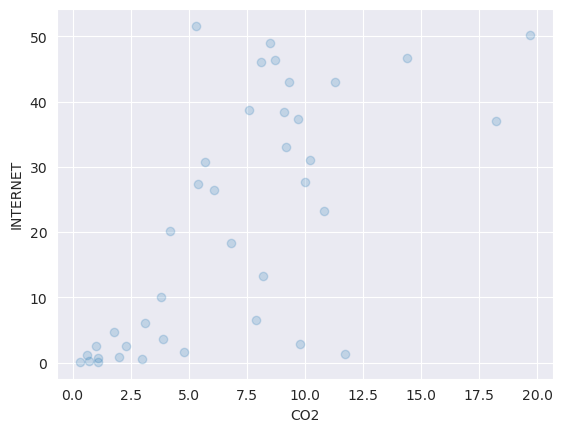

In [57]:
sns.regplot(x = "CO2", y="INTERNET", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

<AxesSubplot:xlabel='CELLULAR', ylabel='INTERNET'>

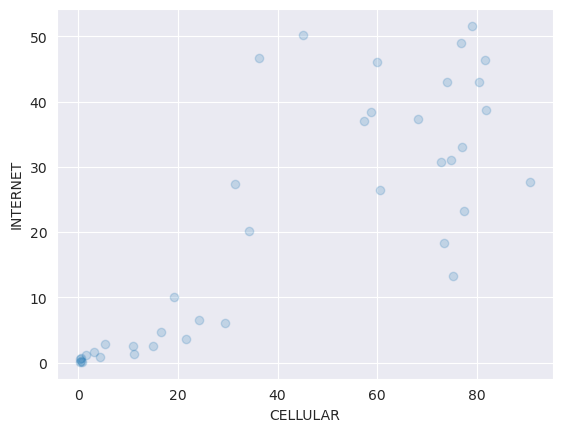

In [58]:
sns.regplot(x = "CELLULAR", y="INTERNET", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

<AxesSubplot:xlabel='FERTILITY', ylabel='INTERNET'>

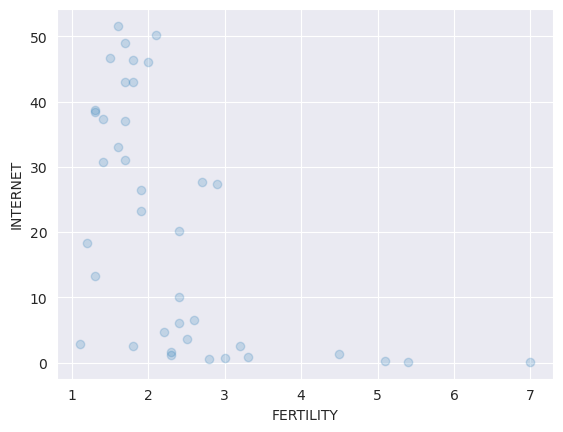

In [59]:
sns.regplot(x = "FERTILITY", y="INTERNET", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

The scatter plots plotted above give an insightful visualization of the above attributes with respect to the target variable "INTERNET".

In [6]:
# 1.(g) Solution

#Pearson's correlation cofficient
columns = df.columns[:6]
corr = df[columns].corr()
corr

,INTERNET,GDP,CO2,CELLULAR,FERTILITY
INTERNET,1.000000,0.888652,0.680161,0.818087,-0.550839
GDP,0.888652,1.000000,0.785595,0.874649,-0.614825
CO2,0.680161,0.785595,1.000000,0.562718,-0.464387
CELLULAR,0.818087,0.874649,0.562718,1.000000,-0.607101
FERTILITY,-0.550839,-0.614825,-0.464387,-0.607101,1.000000


<AxesSubplot:>

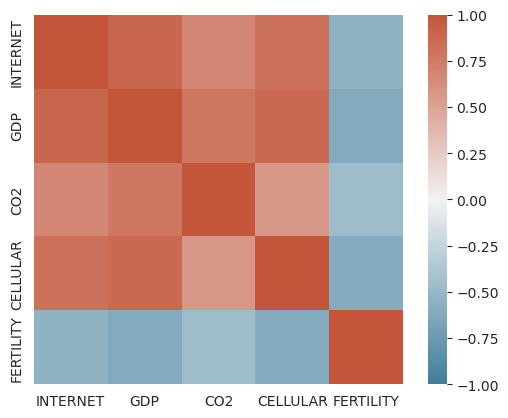

In [7]:
#Heatplot
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin= -1, vmax=1, cmap=cmap)

In [8]:
#Spearman' rank
columns = df.columns[:6]
coor = df[columns].corr(method='spearman')
coor

,INTERNET,GDP,CO2,CELLULAR,FERTILITY
INTERNET,1.000000,0.879765,0.697459,0.831840,-0.651209
GDP,0.879765,1.000000,0.808150,0.822770,-0.654739
CO2,0.697459,0.808150,1.000000,0.644784,-0.548422
CELLULAR,0.831840,0.822770,0.644784,1.000000,-0.636327
FERTILITY,-0.651209,-0.654739,-0.548422,-0.636327,1.000000


<AxesSubplot:>

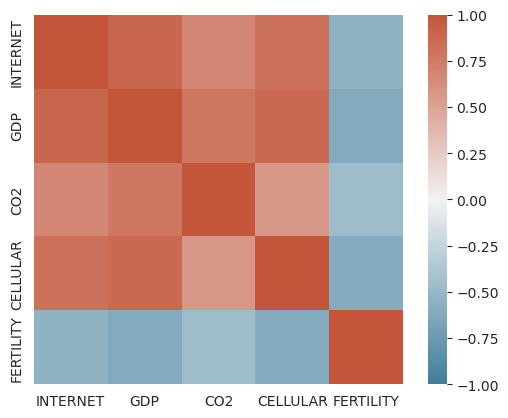

In [9]:
#Heatplot
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin= -1, vmax=1, cmap=cmap)

In [10]:
#Phik correlation coefficient
import phik
columns = df.columns[:6]
corr = df[columns].phik_matrix()
corr

interval columns not set, guessing: ['INTERNET', 'GDP', 'CO2', 'CELLULAR', 'FERTILITY']


,NATION,INTERNET,GDP,CO2,CELLULAR,FERTILITY
NATION,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
INTERNET,1.0,1.000000,0.916130,0.626230,0.626416,0.000000
GDP,1.0,0.916130,1.000000,0.571743,0.666512,0.203364
CO2,1.0,0.626230,0.571743,1.000000,0.650147,0.525842
CELLULAR,1.0,0.626416,0.666512,0.650147,1.000000,0.209265
FERTILITY,1.0,0.000000,0.203364,0.525842,0.209265,1.000000


<AxesSubplot:>

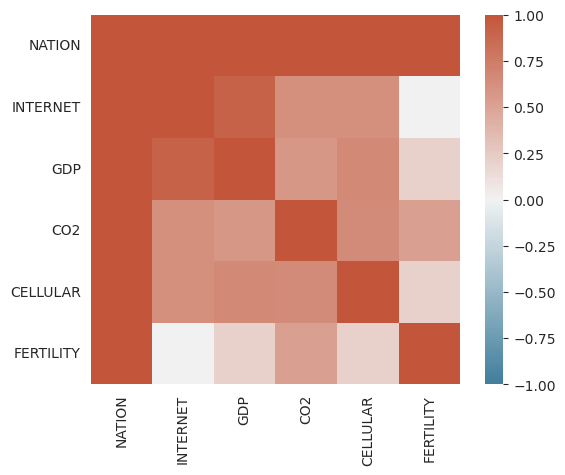

In [11]:
#Heatplot
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin= -1, vmax=1, cmap=cmap)

1.(h) Solution <br>
Correlation between target variable 'INTERNET' and 'GDP': <br>
    - According to the above visualizations and computations through various methods, it can be concluded that <br>
    * 'GDP' has high positive linear correlation with INTERNET' as the value is most closer to 1 as per Pearson's & Spearman's corellation. <br>
    * 'CO2' has positive linear correlation with 'INTERNET' as the value is closer to 1 as per Pearson's & Spearman's corellation. <br>
    * 'CELLULAR' has positive linear correlation with 'INTERNET' as the value is closer to 1 as per Pearson's & Spearman's corellation. <br>
    * 'FERTILITY' has no linear correlation with 'INTERNET' as per Phik's correlation as the value comes out to be zero. As per Pearson's and Spearman's correlation there is total negative colinearity. It can be said that 'FERTILITY' has moderate to no linear dependency . <br>

1.(i) Solution <br>
GDP has the highest positive corellation with the target variable "INTERNET".

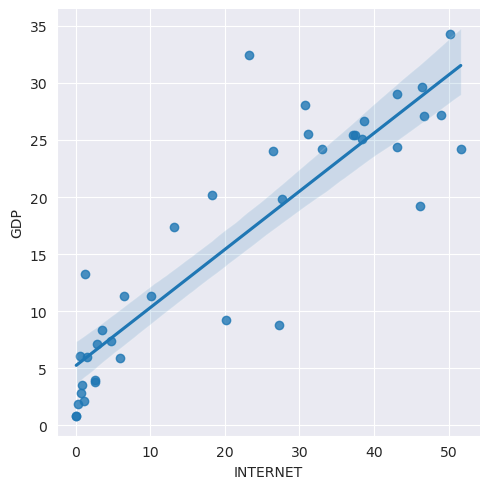

In [49]:
sns.lmplot(x= "INTERNET", y= "GDP", data=df, fit_reg = True)

The above plot represents the scatter plot for the GDP attribute vs INTERNET as GDP has the highest positive correlation with INTERNET.

#2.(a) Solution:

In [54]:
df1 = pd.read_pickle("dataset2.pkl")
df1.columns = ["A","B","C","D","E"]
df1.head()

,A,B,C,D,E
0,1.815722,-0.887920,-1.013439,-0.504971,-0.624591
1,-0.472233,0.030365,-1.135522,0.406024,-0.835597
2,0.468581,-0.992146,-0.306203,-0.867099,-0.208296
3,0.266303,1.306050,0.912887,0.239067,-0.116681
4,0.297278,-0.619446,-2.529637,0.695044,-0.704658


#2.(b) Solution:

In [38]:

df1_sm = df1.describe().iloc[[1,2,5],:]
print("The mean, std deviation and median of the columns are: \n", df1_sm)

The mean, std deviation and median of the columns are: 
              A         B         C         D         E
mean  0.116903 -0.040825  0.073329 -0.094238 -0.116792
std   0.993026  0.857486  1.117824  1.077918  1.012273
50%   0.023029 -0.074746  0.058212 -0.145358 -0.142982


#2.(c) Solution:

In [43]:
df1.loc[df1.B>1].index

Int64Index([3, 10, 11, 37, 40, 42, 45, 51, 52, 58, 66, 79, 85, 97], dtype='int64')

The above mentioned values in column 'B' have values more than 1.00.

#2.(d) Solution:

In [45]:
df2 = df1
df2['B'] = df2['B'].map(lambda x: np.nan if x >=1 else x)
print(df2)

           A         B         C         D         E
0   1.815722 -0.887920 -1.013439 -0.504971 -0.624591
1  -0.472233  0.030365 -1.135522  0.406024 -0.835597
2   0.468581 -0.992146 -0.306203 -0.867099 -0.208296
3   0.266303       NaN  0.912887  0.239067 -0.116681
4   0.297278 -0.619446 -2.529637  0.695044 -0.704658
..       ...       ...       ...       ...       ...
95  0.116047 -1.826845 -0.248618  0.551298  0.980408
96 -1.163298  0.266349  1.386232  0.062512 -1.188572
97  1.503631       NaN -0.980665  0.538733  0.807189
98 -0.262126 -0.922898 -0.756378  0.395675  0.855816
99  1.082018 -1.431388  1.063295  1.958211  2.118802

[100 rows x 5 columns]


The above output represents the required dataframe 'df2'.

#2.(e) Solution:

In [55]:
df2.isna().sum()

A     0
B    14
C     0
D     0
E     0
dtype: int64

The above output represents the NaN values for the columns.

#2.(f) Solution:

In [57]:
df2_imputed = df2.fillna(df2.mean())

df2_sm =  df2_imputed.describe().iloc[[1,2,5],:]

print(df2_sm)

             A         B         C         D         E
mean  0.116903 -0.262380  0.073329 -0.094238 -0.116792
std   0.993026  0.651258  1.117824  1.077918  1.012273
50%   0.023029 -0.262380  0.058212 -0.145358 -0.142982


The above output represents the required summary statistics for the variable df2_sm.

#2.(g) Solution:

In [58]:
df3_imputed = df2.T.fillna(df2.mean(axis=1)).T

df3_sm =  df3_imputed.describe().iloc[[1,2,5],:]

print(df3_sm)


             A         B         C         D         E
mean  0.116903 -0.252534  0.073329 -0.094238 -0.116792
std   0.993026  0.671034  1.117824  1.077918  1.012273
50%   0.023029 -0.171569  0.058212 -0.145358 -0.142982


#2.(h) Solution:

<AxesSubplot:xlabel='A'>

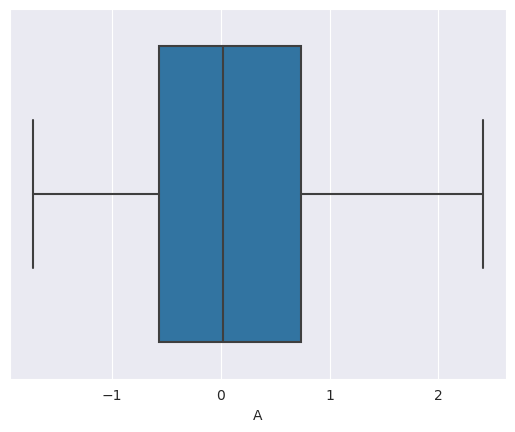

In [65]:
sns.boxplot(data=df1, x='A')

<AxesSubplot:xlabel='B'>

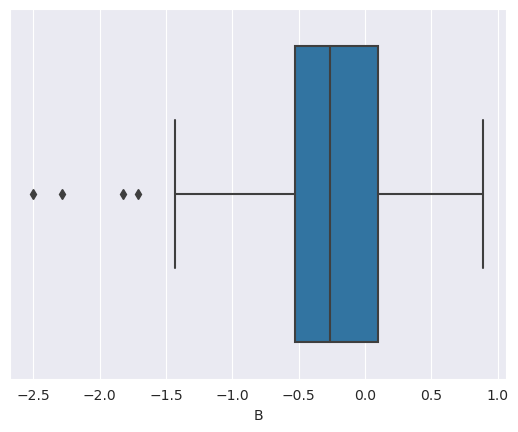

In [66]:
sns.boxplot(data=df2_imputed, x='B')

<AxesSubplot:xlabel='C'>

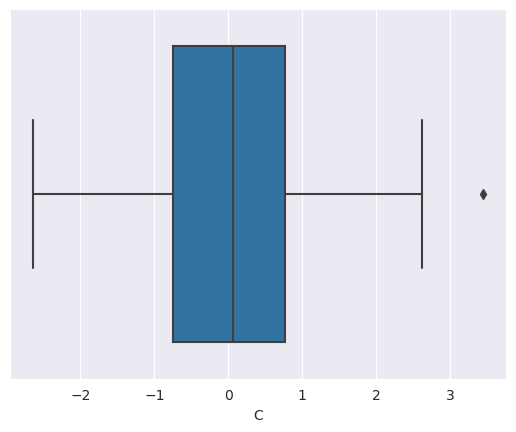

In [67]:
sns.boxplot(data=df3_imputed, x='C')

The above plotted box plots represent the three dataframes as per requirement.

#2.(j) Solution:

As per my opinion, column mean imputation is definitely more effective as the attribute data for each columns are similar. Hence, the mean performed on them would give relevant information for the set of data. On the other hand, row mean imputation for different set of attributes won't give consistent data and insights upon performing the mean operation. The data will be more relevant and optimised if the mean is taken on a similar set of data rather than different data attributes.